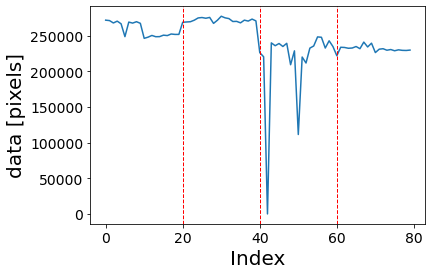

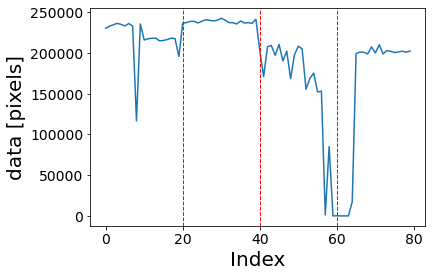

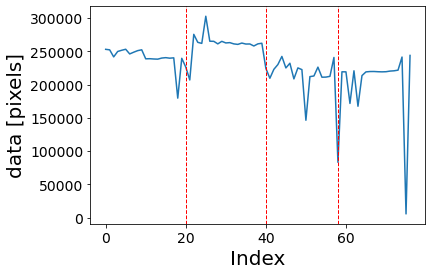

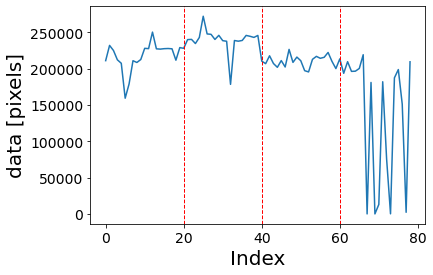

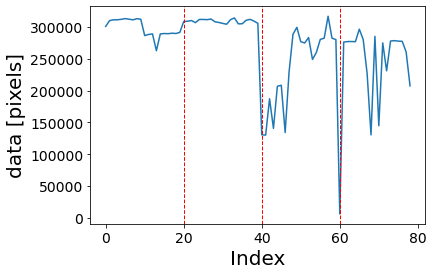

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas as pd

def ccw(x1, y1, x2, y2, x3, y3):
    temp = x1*y2 + x2*y3 + x3*y1 - y1*x2 - y2*x3 - y3*x1
    return temp


path_dir = './dist/screenhistory/N1_11001'
program_list = os.listdir(path_dir)
#program_line = [110, 60, 20, 20, 103, 60, 20, 20, 93, 60, 18, 19, 95, 50, 20, 19, 95, 50, 20, 19]
program_line = [20, 60, 20, 20, 20, 60, 20, 20, 20, 60, 18, 19, 20, 50, 20, 19, 20, 50, 20, 19]
program_start = [90, 83, 73, 75, 75]
for i in range(len(program_list)):
    program_name = program_list[i]
    file_dir = path_dir + '/' + program_name
    file_list = os.listdir(file_dir)
    area_list = []
    start_point = program_start[i]
    
#    for j in range (len(file_list)):
        
    for j in range (len(file_list)-start_point):
        
#        file_name = file_list[j]
        file_name = file_list[j+start_point]
        data = pd.read_csv(file_dir + '/' + file_name)

        x_data = []
        y_data = []
        N = len(data)
        ans = 0

        for k in range(N):
            x_data.append(data['coo_x'].iloc[k])
            y_data.append(data['coo_y'].iloc[k])

        for l in range(N-2):
            area = ccw(x_data[0], y_data[0], x_data[l+1], y_data[l+1], x_data[l+2], y_data[l+2])
            ans += area

        ans = abs(ans) / 2
        
        if program_line[4*i] <= j < (program_line[4*i] + program_line[4*i+1]):
            num = program_line[4*i+1] / 10
            if ( j%num == 1 ) or ( j%num == 3)  :
                area_list.append(ans)
        else:
            area_list.append(ans)
#        area_list.append(ans)

    plt.plot(area_list)
    plt.rc('font', size=14)
    plt.rc('legend', fontsize=24)
    plt.rc('axes', labelsize=20)
#    plt.title(program_name)
    plt.xlabel('Index')
    plt.ylabel('data [pixels]')
    plt.axvline(x=program_line[4*i], color='r', linestyle='--', linewidth=1)
    plt.axvline(x=program_line[4*i] + 20, color='r', linestyle='--', linewidth=1)
    plt.axvline(x=program_line[4*i] + 20 + program_line[4*i+2], color='r', linestyle='--', linewidth=1)
    plt.show()
    
#    df = pd.DataFrame(area_list, columns = ['data'])
#    df.to_csv("./area/" + program_name + ".csv", index=False)
#    del df


In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas as pd

origin = 'C:/Users/Jinse/Desktop/area_cal/dist/screenhistory/N1_11001'
dest = 'C:/Users/Jinse/Desktop/연구실/DB 관리/update_DB/update_DB/Rawdata/N1_11001'

program_line = [20, 60, 20, 20, 20, 60, 20, 20, 20, 60, 18, 19, 20, 50, 20, 19, 20, 50, 20, 19]
program_start = [90, 83, 73, 75, 75]

program_list = os.listdir(origin)

for i in range(len(program_list)):
    program_name = program_list[i]
    program_file = program_name + '.csv'
    file_dir = origin + '/' + program_name
    file_list = os.listdir(file_dir)
    tick_list = []
    start_point = program_start[i]
    data = pd.read_csv(dest + "/" + program_file)
    
    for j in range (len(file_list)-start_point):
        file_name = file_list[j+start_point]
        start_tick = file_name.split('_')[0]
        
        if program_line[4*i] <= j < (program_line[4*i] + program_line[4*i+1]):
            num = program_line[4*i+1] / 10
            if ( j%num == 1 ) or ( j%num == 3)  :
                tick_list.append(start_tick)
        else:
            tick_list.append(start_tick)
    
    print(len(tick_list))
    data['start_tick'] = tick_list
    data.to_csv(dest + '/' +  program_file, index = False)
#        df = pd.DataFrame(tick_list, columns = ['start_tick'])
#        df.to_csv("./area/" + program_name + ".csv", index=False)
#        del df
        
    
    print('')

80

80

77

79

79

